# Powersensor 综合实例 part1

这部分教程主要包含如何使用powersensor完成一些日常任务。

引用需要的库

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time
import PowerSensor as ps
import glob

初始化摄像头和串口模块的操作对象

In [2]:
# 这个对象用于操作摄像头
cam1 = ps.ImageSensor()
# 这个对象用于操作串口
s1 = ps.UsartPort()

# 二维码识别

1. 使用zbar识别通用的二维码
1. 使用apriltag库识别apriltag标识

## 使用zbar库识别通用二维码

很多网站都有提供在线的二维码图片生成工具，本文测试的二维码是用[https://cli.im/](https://cli.im/)生成的。

In [3]:
# 引用二维码库
import zbar
from pyzbar import pyzbar

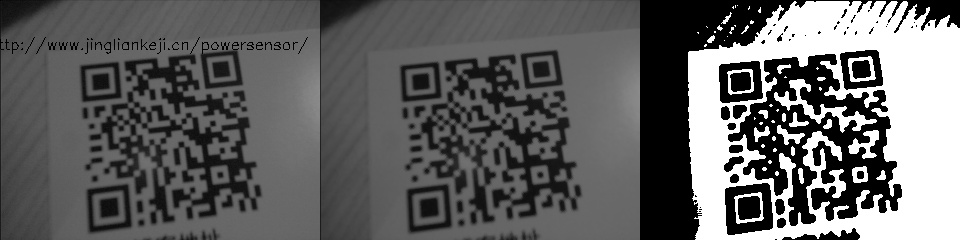

[Decoded(data='http://www.jingliankeji.cn/powersensor/', type='QRCODE', rect=Rect(left=80, top=49, width=184, height=185), polygon=[Point(x=80, y=65), Point(x=88, y=234), Point(x=264, y=209), Point(x=237, y=49)])]
0.0923640727997


In [8]:
for i in range(300):
    
    clear_output(wait=True)    # 清除图片，在同一位置显示，不使用会打印多张图片
    imgMat = cam1.read_img_ori()       # 读入图像
    
    # 缩小图像为320x240尺寸
    origin = cv2.resize(imgMat, (320,240))
    
    # ---------------------  图像处理开始  ----------------------------------------
    start = time.time()        # 记录开始时间
    
    # 把图片转换为灰度图
    img_gray = cv2.cvtColor(origin, cv2.COLOR_BGR2GRAY)
    # 中值滤波
    img_mid = cv2.medianBlur(img_gray, 3)
    # 二值化
    ret,img_binary = cv2.threshold(img_mid, 90, 255, cv2.THRESH_BINARY) # 全局二值化
    # 识别二维码
    result = pyzbar.decode(img_binary)
    # 把结果标在图片上
    if len(result) == 0:
        pass
    else:
        font=cv2.FONT_HERSHEY_SIMPLEX
        text_x = result[0][2][0]
        text_y = result[0][2][1]
        text_wid = result[0][2][2]
        cv2.putText(img_gray, result[0][0], (text_x - text_wid / 2 , text_y), font, 0.5, 0, 1)
        
    end = time.time()        # 记录结束时间
    # ---------------------  图像处理结束  ----------------------------------------       
    
    # 把图像拼接在一起显示
    img_combine = np.hstack([img_gray, img_mid, img_binary])
    ps.CommonFunction.show_img_jupyter(img_combine)# 打印用于差分的两张图片
    print(result)
    print(end - start)
    time.sleep(0.1)

## 使用apriltag库识别apriltag标记

运行程序后，保持Tag36h11在画面里，然后往上下左右移动，在画面的下方可以看到输出的坐标值，第一个是横坐标，第二个是纵坐标。

In [5]:
# 引用库
import apriltag

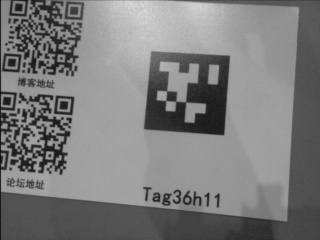

[186.85548954  92.54135343]
Tim:20


In [7]:
detector = apriltag.Detector()
for i in range(100):
    
    clear_output(wait=True)    # 清除图片，在同一位置显示，不使用会打印多张图片
    imgMat = cam1.read_img_ori()       # 读入图像
    
    # 缩小图像为320x240尺寸
    origin = cv2.resize(imgMat, (320,240))
    
    # ---------------------  图像处理开始  ----------------------------------------
    start = time.time()        # 记录开始时间
    
    # 把图片转换为灰度图
    img_gray = cv2.cvtColor(origin, cv2.COLOR_BGR2GRAY)
    # 中值滤波
    img_mid = cv2.medianBlur(img_gray, 3)
    # 二值化
    ret,img_binary = cv2.threshold(img_mid, 120, 255, cv2.THRESH_BINARY) # 全局二值化
    # 识别二维码
    result = detector.detect(img_binary)
        
    end = time.time()        # 记录结束时间
    # ---------------------  图像处理结束  ----------------------------------------       
    
    # 把图像拼接在一起显示
    img_combine = np.hstack([img_gray])
    ps.CommonFunction.show_img_jupyter(img_combine)# 打印用于差分的两张图片
    if len(result) > 0:
        print(result[0][6])
        res = 'Res:' + str(result[0][6])
        s1.u_print(res)
#         time.sleep(1)
    tim_str = 'Tim:' + str((int)((end - start)*1000))
    print(tim_str)
    time.sleep(0.1)

实际上result提供了更丰富的信息，可以用来完整定位标签的位置和姿态，大家可以自行开发，或许等待后续教程。
```python
print(result[0])
        Family: tag36h11
            ID: 0
    Hamming error: 0
        Goodness: 0.0
    Decision margin: 124.666664124
        Homography: [[ 7.02583484e-01 -2.35382052e-01  4.84189739e+00] # 单应矩阵，自行百度
                      [-6.82695217e-02  4.98301018e-01  2.90763050e+00]
                      [-2.24977475e-04 -1.27799591e-03  2.34032006e-02]]
        Center: [206.89039396 124.24072034] # 这个是像素位置
        Corners: [[175.64704895  99.47730255] # 这个是四个角点的像素位置，可以用这个来确定画面旋转的角度
                      [236.33509827  95.72452545]
                      [242.42208862 152.40307617]
                      [174.67114258 155.44396973]]
```


In [9]:
print(result[0])

         Family: tag36h11
             ID: 0
  Hamming error: 0
       Goodness: 0.0
Decision margin: 124.666664124
     Homography: [[ 7.02583484e-01 -2.35382052e-01  4.84189739e+00]
                  [-6.82695217e-02  4.98301018e-01  2.90763050e+00]
                  [-2.24977475e-04 -1.27799591e-03  2.34032006e-02]]
         Center: [206.89039396 124.24072034]
        Corners: [[175.64704895  99.47730255]
                  [236.33509827  95.72452545]
                  [242.42208862 152.40307617]
                  [174.67114258 155.44396973]]


# 使用Haar实现人脸检测
本章节使用训练分类器查找人的正脸，侧脸，人体轮廓，包括猫脸等，当然如果你想自己训练各种识别目标的模型并生成xml文件，之后用于检测也是可以的。
如果更换了xml文件，只需要将训练文件上传到目录，之后更改程序中classifier的名称即可。本示例中我已经将人脸、猫脸、人眼检测的文件放到了当前目录下，直接更改相应名称即可使用。
如果您想用别人训练好的文件，可以百度google搜索一下对应的，基本的人脸训练xml文件可以在我给出的博客链接中下载。

Harr模板参考：
https://github.com/opencv/opencv/tree/master/data/haarcascades

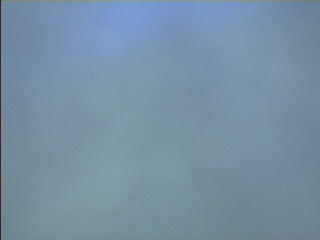

0.0210828781128


In [7]:
classifier=cv2.CascadeClassifier("haarcascade_frontalface_alt.xml")   #确保此xml文件与该py文件在一个文件夹下，否则将这里改为绝对路径，此xml文件可在D:\My Documents\Downloads\opencv\sources\data\haarcascades下找到。

for i in range(100):
    start = time.time()        # 记录开始时间
    clear_output(wait=True)    # 清除图片，在同一位置显示，不使用会打印多张图片
    imgMat = cam1.read_img_ori()  # 读入图像
    
    tempImg = cv2.resize(imgMat, (320,240))  # 缩小图像为320x240尺寸
    
    image=cv2.cvtColor(tempImg,cv2.COLOR_BGR2GRAY)
#     cv2.equalizeHist(image)
    divisor=8
    h=320
    w=240
    minSize=(w/divisor,h/divisor)
    faceRects=classifier.detectMultiScale(image,1.2,2,cv2.CASCADE_SCALE_IMAGE,minSize)

    
    if len(faceRects)>0:
        for faceRect in faceRects:  
            x,y,w,h=faceRect
            cv2.circle(tempImg,(x+w/2,y+h/2),min(w/2,h/2),(255,0,0))
#             cv2.circle(frame,(x+w/4,y+h/4),min(w/8,h/8),(255,0,0))
#             cv2.circle(frame,(x+3*w/4,y+h/4),min(w/8,h/8),(255,0,0))
#             cv2.rectangle(frame,(x+3*w/8,y+3*h/4),(x+5*w/8,y+7*h/8),(255,0,0))
 
    end = time.time()
    # 把图像拼接在一起显示
    ps.CommonFunction.show_img_jupyter(tempImg)# 打印用于差分的两张图片
    print(end - start)
    time.sleep(0.1)

# 彩色小球检测

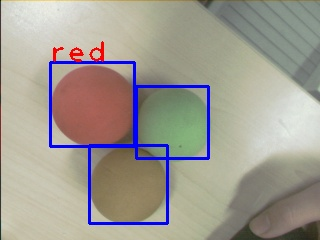

0.063873052597


In [8]:
#小球颜色识别bgr
def colour2(img_b,img_g,img_r) :
    if ((img_b>=60 and img_b<=130 )  and (img_g>=60 and img_g<=130) and (img_r>=140 and img_r<=220) ):
        cv2.putText(origin,'red', (i[0]-i[2],i[1]-i[2]), cv2.FONT_HERSHEY_PLAIN, 2.0, (0, 0, 255), 2)
    elif ((img_b>=70 and img_b<=140) and (img_g>=120 and img_g<=190) and (img_r>=170 and img_r<=240) ):
        cv2.putText(origin,'yellow',(i[0]-i[2],i[1]-i[2]), cv2.FONT_HERSHEY_PLAIN, 2.0, (0, 0, 255), 2)
    elif ((img_b>=70 and img_b<=140) and (img_g>=150 and img_g<=230) and (img_r>=100 and img_r<=170) ):
        cv2.putText(origin,'green', (i[0]-i[2],i[1]-i[2]), cv2.FONT_HERSHEY_PLAIN, 2.0, (0, 0, 255), 2) 
    elif ((img_b>=50 and img_b<=120) and (img_g>=60 and img_g<=120) and (img_r>=70 and img_r<=120) ):
        cv2.putText(origin,'brown', (i[0]-i[2],i[1]-i[2]), cv2.FONT_HERSHEY_PLAIN, 2.0, (0, 0, 255), 2)

for i in range(100):
    clear_output(wait=True)  
    imgMat = cam1.read_img_ori()
    origin = cv2.resize(imgMat, (320,240))
    start = time.time() 
    # 转换为灰度图 
    img_gray = cv2.cvtColor(origin, cv2.COLOR_BGR2GRAY)
    # medianBlur 平滑（模糊）处理
    img_gray = cv2.medianBlur(img_gray, 7)
    #圆检测
    circles = cv2.HoughCircles(img_gray, cv2.HOUGH_GRADIENT, 1, 40, param1=50,param2=35, minRadius=0, maxRadius= 300)    
    if circles is None:
        pass
    else:
        circles = np.uint16(np.around(circles))
        for i in circles[0,:]:
            # 勾画正方形，origin图像、i[2]*2是边长
            cv2.rectangle(origin,(i[0]-i[2],i[1]-i[2]),(i[0]+i[2],i[1]+i[2]),(255,0,0), 2)
            #取球心一小块区域
            roi = origin[i[0]:i[1] , i[0]:i[1]+1] 
            #分离bgr通道
            img_b = np.uint16(np.mean(roi[:,:,0]))
            img_g = np.uint16(np.mean(roi[:,:,1]))
            img_r = np.uint16(np.mean(roi[:,:,2]))
            #判断小球颜色
            colour2(img_b,img_g,img_r)

    # 计 算 消 耗 时 间
    end = time.time()   
    ps.CommonFunction.show_img_jupyter(origin)
    print(end - start)
    time.sleep(0.1) 

# 多边形识别

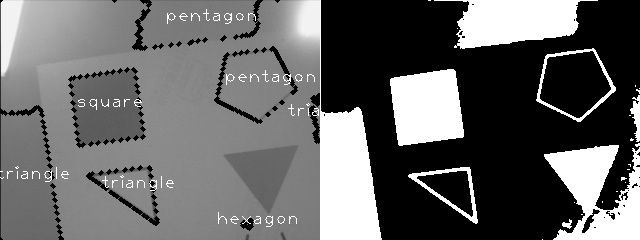

0.016364812851


In [13]:
for i in range(250):
    clear_output(wait=True)    # 清除图片，在同一位置显示，不使用会打印多张图片
    imgMat = cam1.read_img_ori()       # 读入图像

    # 缩小图像为320x240尺寸
    origin = cv2.resize(imgMat, (320,240))

    # ---------------------  图像处理开始  ----------------------------------------
    start = time.time()        # 记录开始时间

    # 把图片转换为灰度图
    img_gray = cv2.cvtColor(origin, cv2.COLOR_BGR2GRAY)
    # 中值滤波
    img_mid = cv2.medianBlur(img_gray, 3)
    # 二值化
    ret,img_binary = cv2.threshold(img_mid, 125, 255, cv2.THRESH_BINARY_INV)#固定值二值化，二值化阈值125
    #img_binary = cv2.adaptiveThreshold(img_mid, 255, cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,3,2)#自适应二值化
    #搜索连通域
    thresh,contours,hierachy = cv2.findContours(img_binary,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

    #连通域逐个检测
    for cnt in range(len(contours)):

        #拟合度参数设置,系数可修改
        epsilon = 0.05*cv2.arcLength(contours[cnt],True)
        #多边形拟合
        approx = cv2.approxPolyDP(contours[cnt],epsilon,True)

        #角点检测
        corners = len(approx)
        #计算面积，用于滤去面积过大或过小的连通域
        area = cv2.contourArea(contours[cnt])



        if  area > 30: #面积范围可随环境变化修改

            #利用图形矩计算连通域质心
            mm = cv2.moments(contours[cnt])
            cx = int(mm['m10'] / mm['m00'])
            cy = int(mm['m01'] / mm['m00'])

            #绘制质心
            #cv2.circle(img_gray, (cx, cy), 3, 0, -1)

            #检测角点
            if corners == 3:
                cv2.drawContours(img_gray,contours[cnt],-1,0,3)
                cv2.putText(img_gray, "triangle ", (cx-30, cy), cv2.FONT_HERSHEY_PLAIN, 1.2, 255, 1)
            elif corners == 4:
                cv2.drawContours(img_gray,contours[cnt],-1,0,3)
                cv2.putText(img_gray, "square ", (cx-30, cy), cv2.FONT_HERSHEY_PLAIN, 1.2, 255, 1)
            elif corners == 5:
                cv2.drawContours(img_gray,contours[cnt],-1,0,3)
                cv2.putText(img_gray, "pentagon ", (cx-30, cy), cv2.FONT_HERSHEY_PLAIN, 1.2, 255, 1)
            elif corners == 6:
                cv2.drawContours(img_gray,contours[cnt],-1,0,3)
                cv2.putText(img_gray, "hexagon ", (cx-30, cy), cv2.FONT_HERSHEY_PLAIN, 1.2, 255, 1)
    # ---------------------  图像处理结束  ----------------------------------------       
    #计 算 消 耗 时 间
    end = time.time()
    img_combine = np.hstack([img_gray,img_binary])
    ps.CommonFunction.show_img_jupyter(img_combine)
    print(end - start)

# 相机标定

## 获取标定图片

存储第20张图片


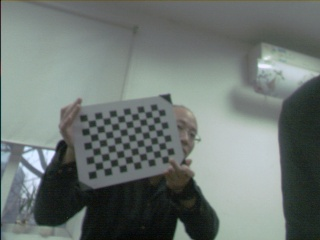

In [4]:
#帧数计数器
frameCnt = 0

frameNum = 200;
for i in range(frameNum):
    clear_output(wait=True)    # 清除图片，在同一位置显示，不使用会打印多张图片
    start = time.time()

    imgMat = cam1.read_img_ori()
    #缩放图像
    tempImg = cv2.resize(imgMat,(960,720))
    displayMat = cv2.resize(imgMat,(320,240))
    #提取灰度图像
    grayMat = cv2.cvtColor(imgMat, cv2.COLOR_BGR2GRAY)  
    #固定值二值化
    ret,img_binary = cv2.threshold(grayMat, 100, 255, cv2.THRESH_BINARY_INV)


    if frameCnt < 10:
        path = "./clbImg/img0"+ str(frameCnt)+".jpg"
    else:
        path = "./clbImg/img"+ str(frameCnt)+".jpg"

    #存储图片间隔：每隔十帧
    if i%10 == 9:

        #计数器自增 
        frameCnt += 1

        #存储图像
        cv2.imwrite(path,grayMat, [int(cv2.IMWRITE_JPEG_QUALITY), 100])
        print("存储第"+str(frameCnt)+"张图片")

    ps.CommonFunction.show_img_jupyter(displayMat)

    end = time.time()
    time.sleep(0.1)

## 标定过程

In [7]:
# 设置寻找亚像素角点的参数，采用的停止准则是最大循环次数30和最大误差容限0.001  
criteria = (cv2.TERM_CRITERIA_MAX_ITER | cv2.TERM_CRITERIA_EPS, 30, 0.001)  

#定义标定板参数,本次实验采用12x9个棋盘格的标定板，每个方格边长20mm
tagCol = 12-1
tagRow = 9-1
tagLen = 20

#获取标定板角点的位置  
objp = np.zeros((tagCol*tagRow,3), np.float32)  
#将世界坐标系建在标定板上，所有点的Z坐标全部为0，所以只需要赋值x和y  
objp[:,:2] = np.mgrid[0:tagCol,0:tagRow].T.reshape(-1,2)  

obj_points = []    # 存储3D点  
img_points = []    # 存储2D点  
#获取图像路径
imgnum = glob.glob('./clbImg/*.jpg')
frameCnt = 0
print("加载图片中...")

for fname in imgnum:
    imgMat = cv2.imread(fname)

    frameCnt = len(img_points)+1
    displayStr =  "加载第"+ str(frameCnt)+"张图"
    print (displayStr)   

    #检测棋盘格角点
    grayMat = cv2.cvtColor(imgMat, cv2.COLOR_BGR2GRAY)  
    ret, corners = cv2.findChessboardCorners(grayMat, (tagCol,tagRow), None) 

    if ret:
        obj_points.append(objp*tagLen)    
        #在原角点的基础上寻找亚像素角点  
        corners2 =  cv2.cornerSubPix(grayMat, corners, (5,5), (-1,-1), criteria)  

        if corners2.all() == None:
            img_points.append(corners)
        else:
            img_points.append(corners2)

        #绘制棋盘角点
        cv2.drawChessboardCorners(imgMat, (tagCol,tagRow), corners,ret)
        #ps.CommonFunction.show_img_jupyter(imgMat)
    else:
        print(fname,"not found")
    time.sleep(0.1)

print("相机标定中...")
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(obj_points, img_points,(960,720), None, None) 
print("标定完成！")

print("ret",ret)
print("mtx:",mtx)
print("dist:",dist)
print("rvecs:",rvecs)
print("tvecs:",tvecs)

加载图片中...
加载第1张图
('./clbImg/img19.jpg', 'not found')
加载第1张图
('./clbImg/img17.jpg', 'not found')
加载第1张图
加载第2张图
加载第3张图
加载第4张图
('./clbImg/img13.jpg', 'not found')
加载第4张图
加载第5张图
加载第6张图
加载第7张图
加载第8张图
加载第9张图
加载第10张图
加载第11张图
加载第12张图
加载第13张图
加载第14张图
加载第15张图
加载第16张图
加载第17张图
相机标定中...
标定完成！
('ret', 0.20734870858074822)
('mtx:', array([[576.56511716,   0.        , 376.48483532],
       [  0.        , 575.95185476, 238.84099889],
       [  0.        ,   0.        ,   1.        ]]))
('dist:', array([[ 0.04603499, -0.05139677, -0.00011535,  0.00048813, -0.07169098]]))
('rvecs:', [array([[-0.34134595],
       [-0.38094176],
       [ 0.09992767]]), array([[-0.00605389],
       [-0.59681627],
       [-0.09495661]]), array([[-0.28844744],
       [-0.41799962],
       [-0.12707115]]), array([[-0.03274171],
       [-0.55143317],
       [-0.11629453]]), array([[-0.25436707],
       [-0.17118506],
       [ 0.19789704]]), array([[-0.24700117],
       [-0.03379217],
       [ 0.25293865]]), array([[-0.12731396],

# 二维码位姿测量

## 根据上面的标定结果给出相机参数变量

In [3]:
camera_para_mtx = np.array([[576.56511716,   0.        ,  376.48483532],
                    [  0.        , 575.95185476, 238.84099889],
                    [  0.        ,   0.        ,   1.        ]])
camera_para = (camera_para_mtx[0, 0], camera_para_mtx[1, 1], camera_para_mtx[0, 2], camera_para_mtx[2, 2])

## 测量aprilTag的位姿

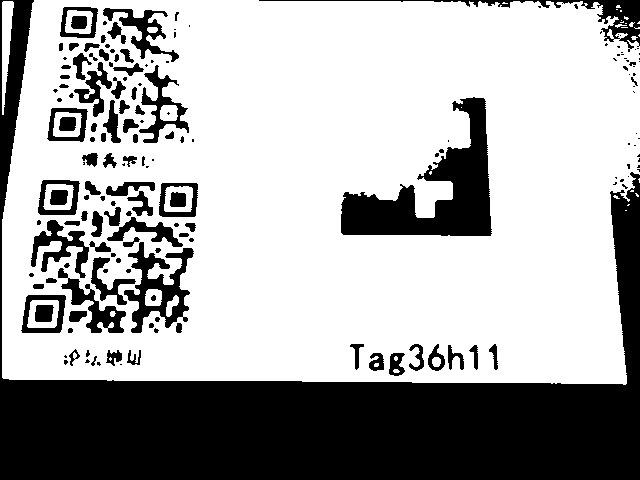

NameError: name 'x' is not defined

In [4]:
import apriltag
detector = apriltag.Detector()
for i in range(200):
    clear_output(wait=True)    # 清除图片，在同一位置显示，不使用会打印多张图片
    imgMat = cam1.read_img_ori()       # 读入图像

    # --------------  图像处理开始  -------------------
    start = time.time()        # 记录开始时间

    # 把图片转换为灰度图
    img_gray = cv2.cvtColor(imgMat, cv2.COLOR_BGR2GRAY)
    # 中值滤波
    img_mid = cv2.medianBlur(img_gray, 3)
    # 二值化
    ret,img_binary = cv2.threshold(img_mid, 90, 255, cv2.THRESH_BINARY) # 全局二值化
    #img_binary = cv2.adaptiveThreshold(img_mid,255,1,1,11,20)#自适应二值化
    # 识别二维码
    detections = detector.detect(img_binary)

    #二维码识别和测量结果
    for det in detections:
        #计算二维码位姿信息,tag_size是apriltag的物理尺寸，边长4厘米
        pose_mtx, init_error, final_error = detector.detection_pose(det, camera_para, tag_size=4)
        x = pose_mtx[0][3]
        y = pose_mtx[1][3]
        z = pose_mtx[2][3]
        
    end = time.time()        # 记录结束时间
    # ------------  图像处理结束  ---------------       

    # 显示图片
    ps.CommonFunction.show_img_jupyter(img_binary)# 打印用于差分的两张图片
    #打印计算时间
    print(end - start, x,y,z)

    time.sleep(0.1)